In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import rankdata
from scipy.stats import t 


# Лабораторная работа №2

In [116]:
df = pd.read_csv('../datasets/students_simple.csv')

In [117]:
N = 25

cols = df.columns.tolist()

feat1 = cols[N % 5]
feat2 = cols[(N ** 2) % 5 + 5]

dt1 = df[feat1]
dt2 = df[feat2]

print('Feature 1: ', feat1)
print('Feature 2: ', feat2)

Feature 1:  height
Feature 2:  age


In [118]:
print(dt1.describe())
print('---------')
print('Nulls in feat1: ', dt1.isna().sum())
print('---------')
print('Unique values in feat1: ', dt1.nunique())

count     20.000000
mean     170.850000
std        8.585637
min      159.000000
25%      163.500000
50%      170.500000
75%      176.000000
max      192.000000
Name: height, dtype: float64
---------
Nulls in feat1:  0
---------
Unique values in feat1:  16


In [119]:
print(dt2.head())
print('---------')
print(dt2.describe())
print('---------')
print('Nulls in feat2: ', dt2.isna().sum())
print('---------')
print('Unique values in feat2: ', dt2.nunique())


0    20
1    25
2    28
3    19
4    23
Name: age, dtype: int64
---------
count    20.00000
mean     23.40000
std       3.63318
min      19.00000
25%      20.00000
50%      23.00000
75%      26.25000
max      30.00000
Name: age, dtype: float64
---------
Nulls in feat2:  0
---------
Unique values in feat2:  9


## Задание 2


#### Коэффициент Фехнера

Коэффициент Фехнера – грубый измеритель силы статистической связи признаков, он рассчитывается по формуле:
$$r_F = \frac{C - H}{C + H}$$

где $C$ – число совпадений знаков $\Delta x_i$ и $\Delta y_i$, а $H$ – число несовпадений ($\Delta x_i = x_i - \bar{x}$, $\Delta y_i = y_i - \bar{y}$).



In [120]:
print("Коэффициент корреляции Фехнера")
print("-"*30)


dt1_mean = np.mean(dt1)
dt2_mean = np.mean(dt2)

sign_1 = np.sign(dt1 - dt1_mean)
sign_2 = np.sign(dt2 - dt2_mean)

C = np.sum(sign_1 * sign_2 > 0) 
H = np.sum(sign_1 * sign_2 < 0) 

fechner = (C - H) / (C + H)

print(f"Cовпадающие знаки: {C}")
print(f"Несовпадающие знаки: {H}")
print(f"Коэффициент корреляции Фехнера: {fechner:.4f}")

Коэффициент корреляции Фехнера
------------------------------
Cовпадающие знаки: 11
Несовпадающие знаки: 9
Коэффициент корреляции Фехнера: 0.1000



#### Коэффициент Пирсона

$$
r_P = \frac{\sum\limits_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum\limits_{i=1}^{n}(x_i - \bar{x})^2} \sqrt{\sum\limits_{i=1}^{n}(y_i - \bar{y})^2}}
$$

In [121]:
print("Коэффициент корреляции Пирсона")
print("-"*30)

n = len(dt1)

mean_x = np.mean(dt1)
mean_y = np.mean(dt2)

numerator = np.sum((dt1 - mean_x) * (dt2 - mean_y))

sum_sq_x = np.sum((dt1 - mean_x)**2)
sum_sq_y = np.sum((dt2 - mean_y)**2)
denominator = np.sqrt(sum_sq_x * sum_sq_y)

pearson_r = numerator / denominator

if abs(pearson_r) < 1: 
    t_stat = pearson_r * np.sqrt((n - 2) / (1 - pearson_r**2))
    pearson_p = 2 * (1 - stats.t.cdf(abs(t_stat), n - 2))
else:
    pearson_p = 0

print(f"Коэффициент корреляции Пирсона: {pearson_r:.4f}")
print(f"P-значение: {pearson_p:.6f}")


alpha = 0.05
z = np.arctanh(pearson_r) 
se = 1 / np.sqrt(n - 3)
z_critical = stats.norm.ppf(1 - alpha/2)

ci_lower_z = z - z_critical * se
ci_upper_z = z + z_critical * se

ci_lower = np.tanh(ci_lower_z)
ci_upper = np.tanh(ci_upper_z)

print(f"95% доверительный интервал: [{ci_lower:.4f}, {ci_upper:.4f}]")

if pearson_p < 0.05:
    print("Корреляция статистически значима на уровне 5%")
else:
    print("Корреляция статистически незначима на уровне 5%")

Коэффициент корреляции Пирсона
------------------------------
Коэффициент корреляции Пирсона: 0.1944
P-значение: 0.411547
95% доверительный интервал: [-0.2715, 0.5865]
Корреляция статистически незначима на уровне 5%


- Наблюдаемая корреляция между ростом и возрастом: r = 0.19 (слабая положительная связь)
- 95% доверительный интервал: [−0.27, 0.59] (включает ноль)
- P-значение (вероятность получить значение коэффициента 0.41 или более при отсутствии фактической корреляции): p = 0.41 > 0.05 (статистически незначимо)

Вывод: Корреляция статистически незначима. Истинная корреляция в генеральной совокупности может быть как положительной, так и отрицательной, или вообще отсутствовать.


### Коэффициент Спирмена

Ранг — это порядковый номер значения в упорядоченном ряду данных. Ранжирование означает присвоение каждому значению места в порядке возрастания (от наименьшего к наибольшему).

Практический алгоритм вычисления  коэффициента Спирмена:

1. Ранжирование значений
2. Если встречаются одинаковые значения, присваиваем им средний ранг
3. Для каждой пары наблюдений вычисляем $d_i = R(x_i) - R(y_i)$
5. Рассчитываем коэффициент по следующей формуле: 

$$
\rho = 1 - \frac{6 \sum\limits_{i=1}^{n} d_i^2}{n(n^2 - 1)}
$$

In [122]:
print("Коэффициент корреляции Спирмена")
print("-"*30)

ranks1 = rankdata(dt1)
ranks2 = rankdata(dt2)
    
d = ranks1 - ranks2
sum_d_squared = np.sum(d**2)
    
rho = 1 - (6 * sum_d_squared) / (n * (n**2 - 1))
    
t_stat = rho * np.sqrt((n-2) / (1 - rho**2))
p_value = 2 * (1 - t.cdf(abs(t_stat), n-2))

print(f"Коэффициент корреляции Спирмена: {rho:.4f}")
print(f"P-значение: {p_value:.6f}")

if p_value < 0.05:
    print("Корреляция статистически значима на уровне 5%")
else:
    print("Корреляция статистически незначима на уровне 5%")

Коэффициент корреляции Спирмена
------------------------------
Коэффициент корреляции Спирмена: 0.1831
P-значение: 0.439750
Корреляция статистически незначима на уровне 5%


#### Коэффициент Кенделла

Пара наблюдений $(x_i, y_i)$ и $(x_j, y_j), i<j$ называется:

- согласованной, если $(x_i - x_j)(y_i - y_j) > 0$,
- несогласованной, если $(x_i - x_j)(y_i - y_j) < 0$.

Пусть $C$ — число согласованных пар, $D$ — число несогласованных пар. Тогда:

$$
\tau = \frac{2(C - D)}{n(n - 1)}
$$

In [123]:
print("\n4. Коэффициент корреляции Кенделла")
print("-"*30)

n = len(dt1)
С = 0 
D = 0 

for i in range(n):
    for j in range(i + 1, n):
        sign_x = np.sign(dt1.iloc[i] - dt1.iloc[j])
        sign_y = np.sign(dt2.iloc[i] - dt2.iloc[j])
        if sign_x * sign_y > 0:
            С += 1 
        elif sign_x * sign_y < 0:
            D += 1 

kendall_tau = 2*(С - D) / (n*(n-1))

se = np.sqrt(2 * (2 * n + 5) / (9 * n * (n - 1)))
z = kendall_tau / se
kendall_p = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"Количество согласованных пар: {С}")
print(f"Количество несогласованных пар: {D}")
print(f"Коэффициент корреляции Кенделла (tau): {kendall_tau:.4f}")
print(f"P-значение: {kendall_p:.6f}")

if kendall_p < 0.05:
    print("Корреляция статистически значима на уровне 5%")
else:
    print("Корреляция статистически незначима на уровне 5%")



4. Коэффициент корреляции Кенделла
------------------------------
Количество согласованных пар: 96
Количество несогласованных пар: 74
Коэффициент корреляции Кенделла (tau): 0.1158
P-значение: 0.475367
Корреляция статистически незначима на уровне 5%


### Вывод

| Метод | Коэффициент | P-значение | Статистическая значимость |
|-------|-------------|------------|---------------------------|
| **Фехнер** | 0.1000 | - | - |
| **Пирсон** | 0.1944 | 0.4115 | Незначима |
| **Спирмен** | 0.1750 | 0.4605 | Незначима |
| **Кенделл** | 0.1223 | 0.4698 | Незначима |

Все коэффициенты показывают слабую положительную связь между ростом и возрастом. Значения коэффициентов близки друг к другу (0.10-0.19), что указывает на согласованность методов. Однако все p-значения > 0.05 => корреляция статистически незначима. Также 95% доверительный интервал Пирсона [−0.27, 0.59] включает ноль. Это означает, что истинная корреляция может быть как положительной, так и отрицательной

Отсутствует статистически значимая линейная зависимость


## Задание 2

In [124]:
def common_visualization(feat):

    mean_val = feat.mean()
    median_val = feat.median()
    
    q25 = feat.quantile(0.25)
    q50 = feat.quantile(0.50)
    q75 = feat.quantile(0.75)
    
    num_bins = int(np.log2(feat.size) + 1)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    

    ax1.hist(feat, bins=num_bins, alpha=0.7, color='green', edgecolor='black')
    ax1.set_title(f'Гистограмма: {feat.name}')
    ax1.set_xlabel('Значения')
    ax1.set_ylabel('Частота')
    ax1.grid(True, alpha=0.3)
    ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.2f}')
    ax1.axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.2f}')
    ax1.legend()
    

    sorted_data = np.sort(feat.dropna())
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ax2.step(sorted_data, y_values, where='post', color='darkblue', linewidth=2)
    ax2.set_title(f'Эмпирическая функция распределения: {feat.name}')
    ax2.set_xlabel('Значения')
    ax2.set_ylabel('Вероятность P(X ≤ x)')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 1)
    
    ax2.axvline(q25, color='orange', linestyle=':', label=f'Q1: {q25:.2f}')
    ax2.axvline(q50, color='green', linestyle=':', label=f'Q2: {q50:.2f}')
    ax2.axvline(q75, color='red', linestyle=':', label=f'Q3: {q75:.2f}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

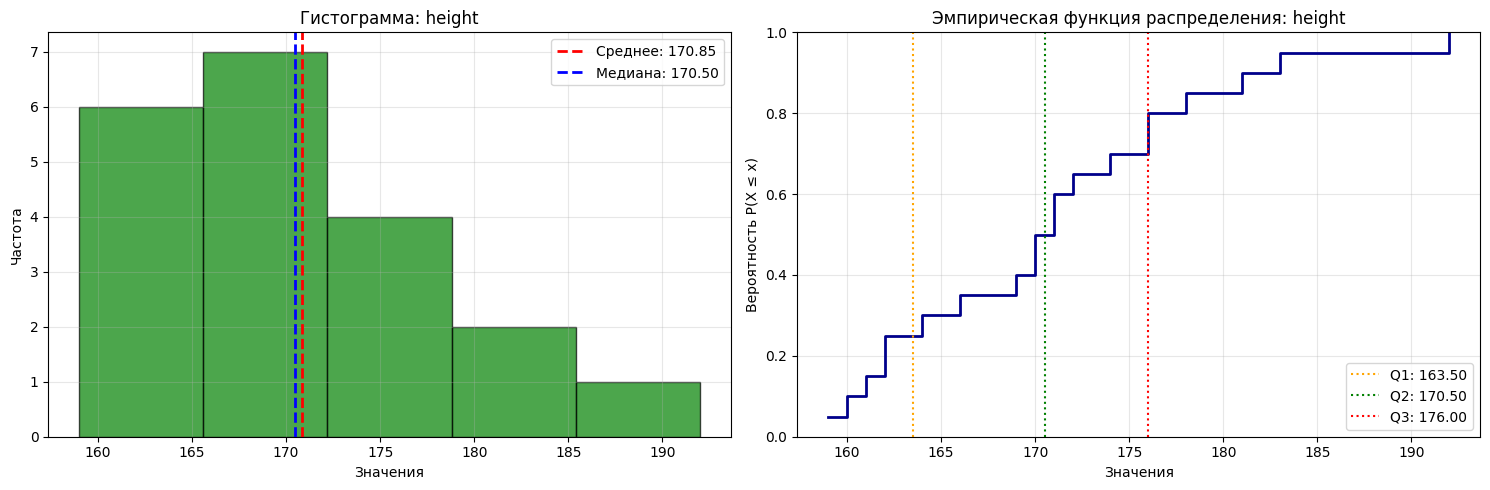

In [125]:
common_visualization(dt1)

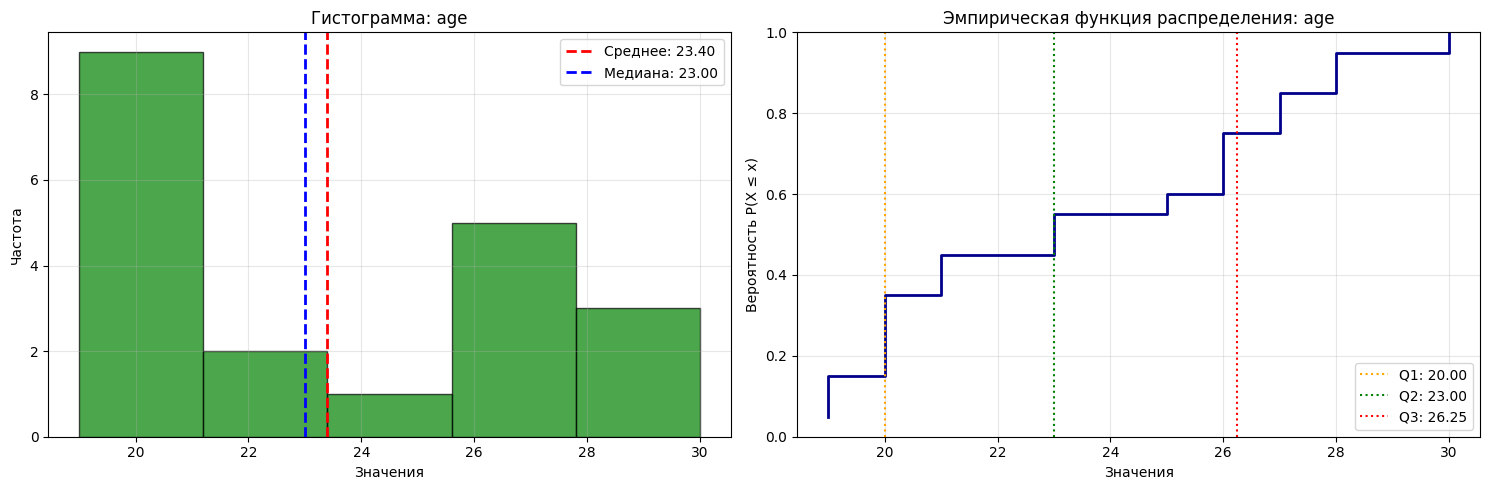

In [126]:
common_visualization(dt2)

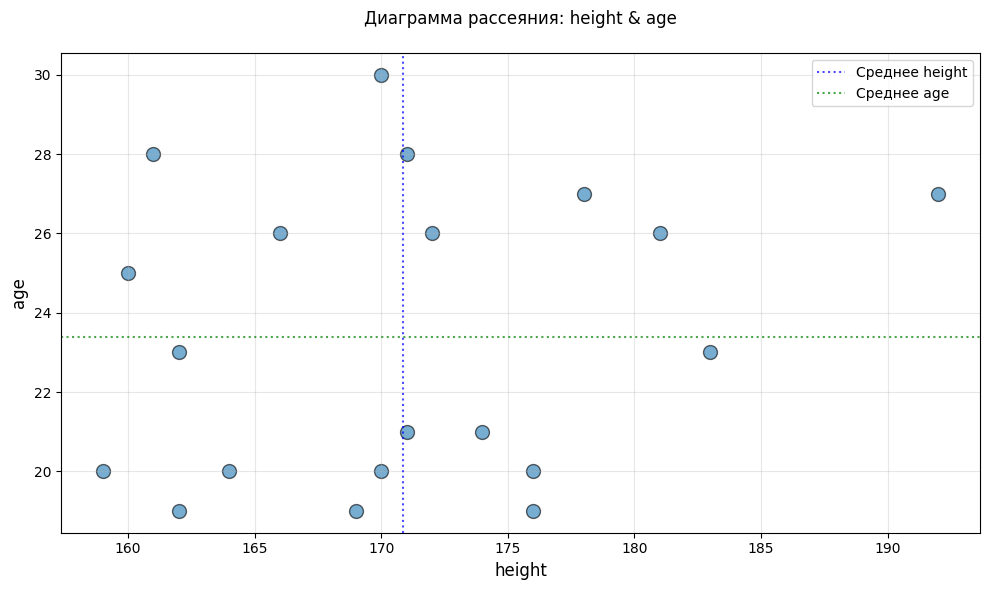

In [127]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(dt1, dt2, alpha=0.6, s=100, edgecolors='black', linewidth=1)

ax.axvline(dt1_mean, color='blue', linestyle=':', alpha=0.7, label=f'Среднее {dt1.name}')
ax.axhline(dt2_mean, color='green', linestyle=':', alpha=0.7, label=f'Среднее {dt2.name}')

ax.set_xlabel(dt1.name, fontsize=12)
ax.set_ylabel(dt2.name, fontsize=12)
ax.set_title(f'Диаграмма рассеяния: {dt1.name} & {dt2.name}\n')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Эмпирическое распределение переменных не соответствует какому-либо стандартному теоретическому распределению, что видно из гистограмм. Однако для регрессионного анализа это не принципиально.

## Задание 3

In [128]:
x_data = dt1
y_data = dt2
n = len(x_data)

x_range = np.linspace(x_data.min(), x_data.max(), 100)
results_manual = {}

Среднеквадратичная ошибка (RMSE)
$$\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}i)^2}$$
Среднее абсолютное отклонение (MAE)
$$\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}i|$$
Коэффициент детерминации $R^2$
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

In [129]:
def calculate_r2(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - y_mean) ** 2)
    return 1 - (ss_res / ss_tot)

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

### Линейная регрессия

$$\hat{y}(x, w) = w_1 x + w_0$$
где:
$\hat{y}$ - предсказанное значение
$w_1$ - коэффициент наклона
$w_0$ - свободный член

Функция потерь (метод наименьших квадратов)
$$Q(w) = \sum_{i=1}^{n} (y_i - \hat{y}(x_i, w))^2 = \sum_{i=1}^{n} (y_i - w_1 x_i - w_0)^2 \rightarrow \min_{w}$$
Необходимое условие минимума:
$$\frac{\partial Q}{\partial w_0} = 0 \quad \text{и} \quad \frac{\partial Q}{\partial w_1} = 0$$
Вычисляя производные и решая систему имеем:
$$w_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$$
$$w_0 = \bar{y} - w_1 \bar{x}$$
где $\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$ и $\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$


In [130]:
def linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    
    w1 = numerator / denominator 
    w0 = y_mean - w1 * x_mean
    
    return w0, w1

In [131]:
w0_linear, w1_linear = linear_regression(x_data, y_data)
y_pred_linear = w1_linear * x_data + w0_linear
y_range_linear = w1_linear * x_range + w0_linear

r2_linear = calculate_r2(y_data, y_pred_linear)
rmse_linear = calculate_rmse(y_data, y_pred_linear)
mae_linear = calculate_mae(y_data, y_pred_linear)

print(f"Уравнение: y = {w1_linear:.4f}*x + {w0_linear:.4f}")
print(f"Коэффициент детерминации R²: {r2_linear:.4f}")
print(f"Среднеквадратичная ошибка RMSE: {rmse_linear:.4f}")
print(f"Среднее абсолютное отклонение MAE: {mae_linear:.4f}")

results_manual['Линейная'] = {
    'w0': w0_linear,
    'w1': w1_linear,
    'y_pred': y_pred_linear,
    'y_range': y_range_linear,
    'equation': f"y = {w1_linear:.4f}*x + {w0_linear:.4f}",
    'r2': r2_linear,
    'rmse': rmse_linear,
    'mae': mae_linear
}

Уравнение: y = 0.0823*x + 9.3470
Коэффициент детерминации R²: 0.0378
Среднеквадратичная ошибка RMSE: 3.4736
Среднее абсолютное отклонение MAE: 3.1630


### Квадратичная регрессия

$$\hat{y}(x, w) = w_2 x^2 + w_1 x + w_0$$
Функция потерь
$$Q(w) = \sum_{i=1}^{n} (y_i - w_2 x_i^2 - w_1 x_i - w_0)^2 \rightarrow \min_{w}$$
Необходимые условия минимума:
$$\frac{\partial Q}{\partial w_0} = 0, \quad \frac{\partial Q}{\partial w_1} = 0, \quad \frac{\partial Q}{\partial w_2} = 0$$
Матричная форма системы:
$$\begin{bmatrix}
n & \sum x_i & \sum x_i^2 \\
\sum x_i & \sum x_i^2 & \sum x_i^3 \\
\sum x_i^2 & \sum x_i^3 & \sum x_i^4
\end{bmatrix}
\begin{bmatrix}
w_0 \\
w_1 \\
w_2
\end{bmatrix}
=
\begin{bmatrix}
\sum y_i \\
\sum x_i y_i \\
\sum x_i^2 y_i
\end{bmatrix}$$
Решение через обратную матрицу:
$$\mathbf{w} = \mathbf{A}^{-1} \mathbf{b}$$
где:
$\mathbf{A}$ - матрица коэффициентов системы
$\mathbf{b}$ - вектор правых частей
$\mathbf{w} = [w_0, w_1, w_2]^T$

In [132]:
def quadratic_regression_manual(x, y):

    n = len(x)
    
    A = np.array([
        [n, np.sum(x), np.sum(x**2)],
        [np.sum(x), np.sum(x**2), np.sum(x**3)],
        [np.sum(x**2), np.sum(x**3), np.sum(x**4)]
    ])
    
    b = np.array([
        np.sum(y),
        np.sum(x * y),
        np.sum(x**2 * y)
    ])
    
    w = np.linalg.solve(A, b)
    w0, w1, w2 = w[0], w[1], w[2]
    
    return w0, w1, w2

In [133]:
w0_quadratic, w1_quadratic, w2_quadratic = quadratic_regression_manual(x_data, y_data)
y_pred_quadratic = w2_quadratic * x_data**2 + w1_quadratic * x_data + w0_quadratic
y_range_quadratic = w2_quadratic * x_range**2 + w1_quadratic * x_range + w0_quadratic

r2_quadratic = calculate_r2(y_data, y_pred_quadratic)
rmse_quadratic = calculate_rmse(y_data, y_pred_quadratic)
mae_quadratic = calculate_mae(y_data, y_pred_quadratic)

print(f"Уравнение: y = {w2_quadratic:.4f}*x² + {w1_quadratic:.4f}*x + {w0_quadratic:.4f}")
print(f"Коэффициент детерминации R²: {r2_quadratic:.4f}")
print(f"Среднеквадратичная ошибка RMSE: {rmse_quadratic:.4f}")
print(f"Среднее абсолютное отклонение MAE: {mae_quadratic:.4f}")

results_manual['Квадратичная'] = {
    'w0': w0_quadratic,
    'w1': w1_quadratic,
    'w2': w2_quadratic,
    'y_pred': y_pred_quadratic,
    'y_range': y_range_quadratic,
    'equation': f"y = {w2_quadratic:.4f}*x² + {w1_quadratic:.4f}*x + {w0_quadratic:.4f}",
    'r2': r2_quadratic,
    'rmse': rmse_quadratic,
    'mae': mae_quadratic
}

Уравнение: y = 0.0053*x² + -1.7715*x + 169.6891
Коэффициент детерминации R²: 0.0559
Среднеквадратичная ошибка RMSE: 3.4408
Среднее абсолютное отклонение MAE: 3.0579


### Гиперболическая регрессия

Исходная модель: $$y = \frac{w_1}{x} + w_0$$

Преобразуем к линейной модели

Замена переменной: $z = \frac{1}{x}$

Линейная модель: $y = w_1 z + w_0$

Далее применяем функцию линейной регрессии. После нахождения $w_0$ и $w_1$ возвращаемся к исходной форме:
$$y = \frac{w_1}{x} + w_0$$

In [134]:
def hyperbolic_regression_manual(x, y):
    x_transformed = 1 / x
    w0, w1 = linear_regression(x_transformed, y)
    return w0, w1

In [135]:
w0_hyperbolic, w1_hyperbolic = hyperbolic_regression_manual(x_data, y_data)
y_pred_hyperbolic = w1_hyperbolic / x_data + w0_hyperbolic
y_range_hyperbolic = w1_hyperbolic / x_range + w0_hyperbolic

r2_hyperbolic = calculate_r2(y_data, y_pred_hyperbolic)
rmse_hyperbolic = calculate_rmse(y_data, y_pred_hyperbolic)
mae_hyperbolic = calculate_mae(y_data, y_pred_hyperbolic)

print(f"Уравнение: y = {w1_hyperbolic:.4f}/x + {w0_hyperbolic:.4f}")
print(f"Коэффициент детерминации R²: {r2_hyperbolic:.4f}")
print(f"Среднеквадратичная ошибка RMSE: {rmse_hyperbolic:.4f}")
print(f"Среднее абсолютное отклонение MAE: {mae_hyperbolic:.4f}")

results_manual['Гиперболическая'] = {
    'w0': w0_hyperbolic,
    'w1': w1_hyperbolic,
    'y_pred': y_pred_hyperbolic,
    'y_range': y_range_hyperbolic,
    'equation': f"y = {w1_hyperbolic:.4f}/x + {w0_hyperbolic:.4f}",
    'r2': r2_hyperbolic,
    'rmse': rmse_hyperbolic,
    'mae': mae_hyperbolic
}

Уравнение: y = -2351.7113/x + 37.1970
Коэффициент детерминации R²: 0.0347
Среднеквадратичная ошибка RMSE: 3.4792
Среднее абсолютное отклонение MAE: 3.1731


## Показательная регрессия

Исходная модель: $$y = w_0 \cdot w_1^x$$
Приведем к линейной регрессии с помощью логарифмического преобразования: $$\ln y = \ln(w_0 \cdot w_1^x) = \ln w_0 + x \ln w_1$$
Линейная модель: $$\ln y = (\ln w_1) \cdot x + \ln w_0$$

Замена переменных

Обозначим:
$y' = \ln y$,
$a = \ln w_1$,
$b = \ln w_0$,
Линейная модель: $$y' = a x + b$$

Далее применяем формулу линейной регрессии, а затем обратное преобразование
$$w_1 = e^a$$
$$w_0 = e^b$$

Итоговая модель: $y = e^b \cdot e^{a x} = w_0 \cdot w_1^x$

In [136]:
def exponential_regression_manual(x, y):
    if np.any(y <= 0):
        print("Ошибка: для показательной регрессии все значения y должны быть положительными")
        return None, None
    
    y_transformed = np.log(y)
    ln_w0, ln_w1 = linear_regression(x, y_transformed)
    
    w0 = np.exp(ln_w0)
    w1 = np.exp(ln_w1)
    
    return w0, w1

In [137]:
w0_exponential, w1_exponential = exponential_regression_manual(x_data, y_data)

if w0_exponential is not None and w1_exponential is not None:
    y_pred_exponential = w0_exponential * (w1_exponential ** x_data)
    y_range_exponential = w0_exponential * (w1_exponential ** x_range)
    
    r2_exponential = calculate_r2(y_data, y_pred_exponential)
    rmse_exponential = calculate_rmse(y_data, y_pred_exponential)
    mae_exponential = calculate_mae(y_data, y_pred_exponential)
    
    print(f"Уравнение: y = {w0_exponential:.4f} * {w1_exponential:.4f}^x")
    print(f"Коэффициент детерминации R²: {r2_exponential:.4f}")
    print(f"Среднеквадратичная ошибка RMSE: {rmse_exponential:.4f}")
    print(f"Среднее абсолютное отклонение MAE: {mae_exponential:.4f}")

    results_manual['Показательная'] = {
        'w0': w0_exponential,
        'w1': w1_exponential,
        'y_pred': y_pred_exponential,
        'y_range': y_range_exponential,
        'equation': f"y = {w0_exponential:.4f} * {w1_exponential:.4f}^x",
        'r2': r2_exponential,
        'rmse': rmse_exponential,
        'mae': mae_exponential
    }
else:
    print("Показательная регрессия не может быть построена для данных значений")
    results_manual['Показательная'] = None
    

Уравнение: y = 12.4755 * 1.0036^x
Коэффициент детерминации R²: 0.0336
Среднеквадратичная ошибка RMSE: 3.4812
Среднее абсолютное отклонение MAE: 3.1590


In [138]:
print("\n" + "="*70)
print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА МОДЕЛЕЙ")
print("="*70)

print(f"{'Модель':<15} {'R²':<8} {'RMSE':<8} {'MAE':<8} {'Уравнение'}")
print("-"*70)

for model_name, result in results_manual.items():
    print(f"{model_name:<15} {result['r2']:<8.4f} {result['rmse']:<8.4f} {result['mae']:<8.4f} {result['equation']}")

print("="*70)


СРАВНИТЕЛЬНАЯ ТАБЛИЦА МОДЕЛЕЙ
Модель          R²       RMSE     MAE      Уравнение
----------------------------------------------------------------------
Линейная        0.0378   3.4736   3.1630   y = 0.0823*x + 9.3470
Квадратичная    0.0559   3.4408   3.0579   y = 0.0053*x² + -1.7715*x + 169.6891
Гиперболическая 0.0347   3.4792   3.1731   y = -2351.7113/x + 37.1970
Показательная   0.0336   3.4812   3.1590   y = 12.4755 * 1.0036^x


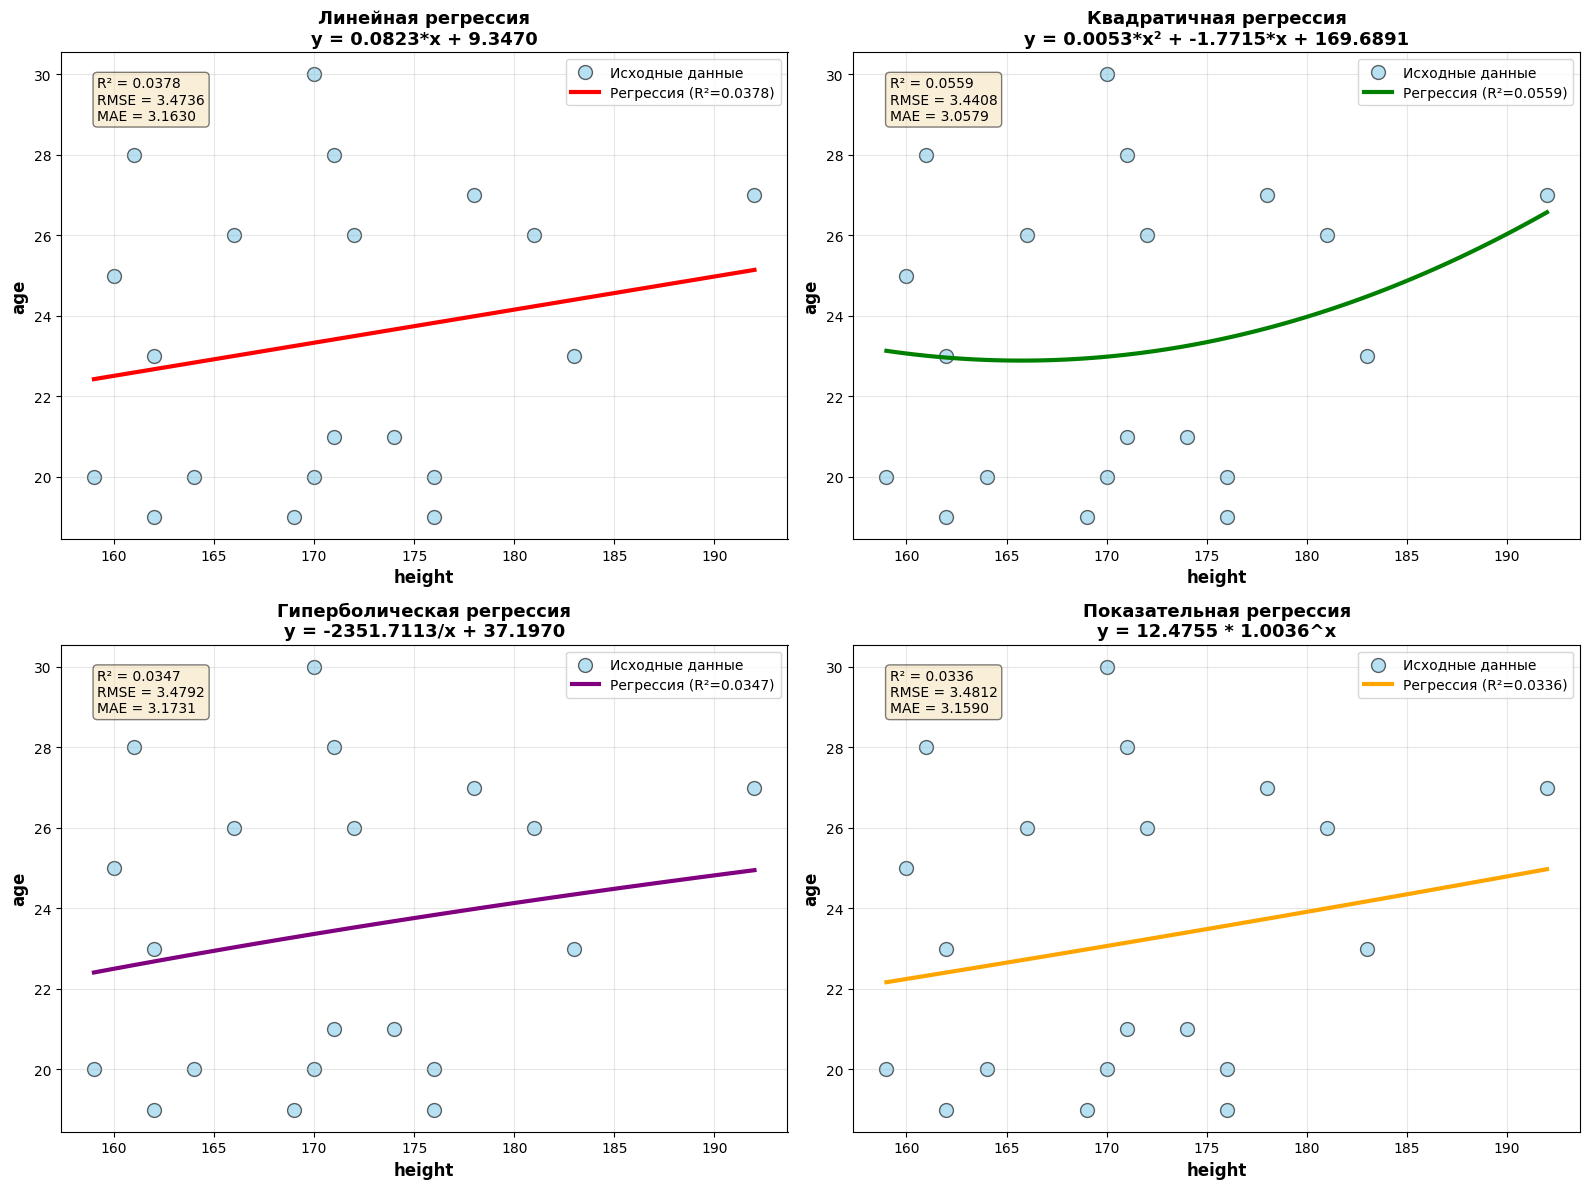

In [139]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

colors = ['red', 'green', 'purple', 'orange']
model_names = list(results_manual.keys())

for idx, (model_name, color) in enumerate(zip(model_names, colors)):
    ax = axes[idx]
    if results_manual[model_name] is not None:
        result = results_manual[model_name]
        
        ax.scatter(x_data, y_data, alpha=0.6, s=100, edgecolors='black', 
                   linewidth=1, label='Исходные данные', color='skyblue')
        
        ax.plot(x_range, result['y_range'], color=color, linewidth=3, 
                label=f'Регрессия (R²={result["r2"]:.4f})')
        
        ax.set_xlabel(dt1.name, fontsize=12, fontweight='bold')
        ax.set_ylabel(dt2.name, fontsize=12, fontweight='bold')
        ax.set_title(f'{model_name} регрессия\n{result["equation"]}', 
                     fontsize=13, fontweight='bold')
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3)

        textstr = f'R² = {result["r2"]:.4f}\nRMSE = {result["rmse"]:.4f}\nMAE = {result["mae"]:.4f}'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

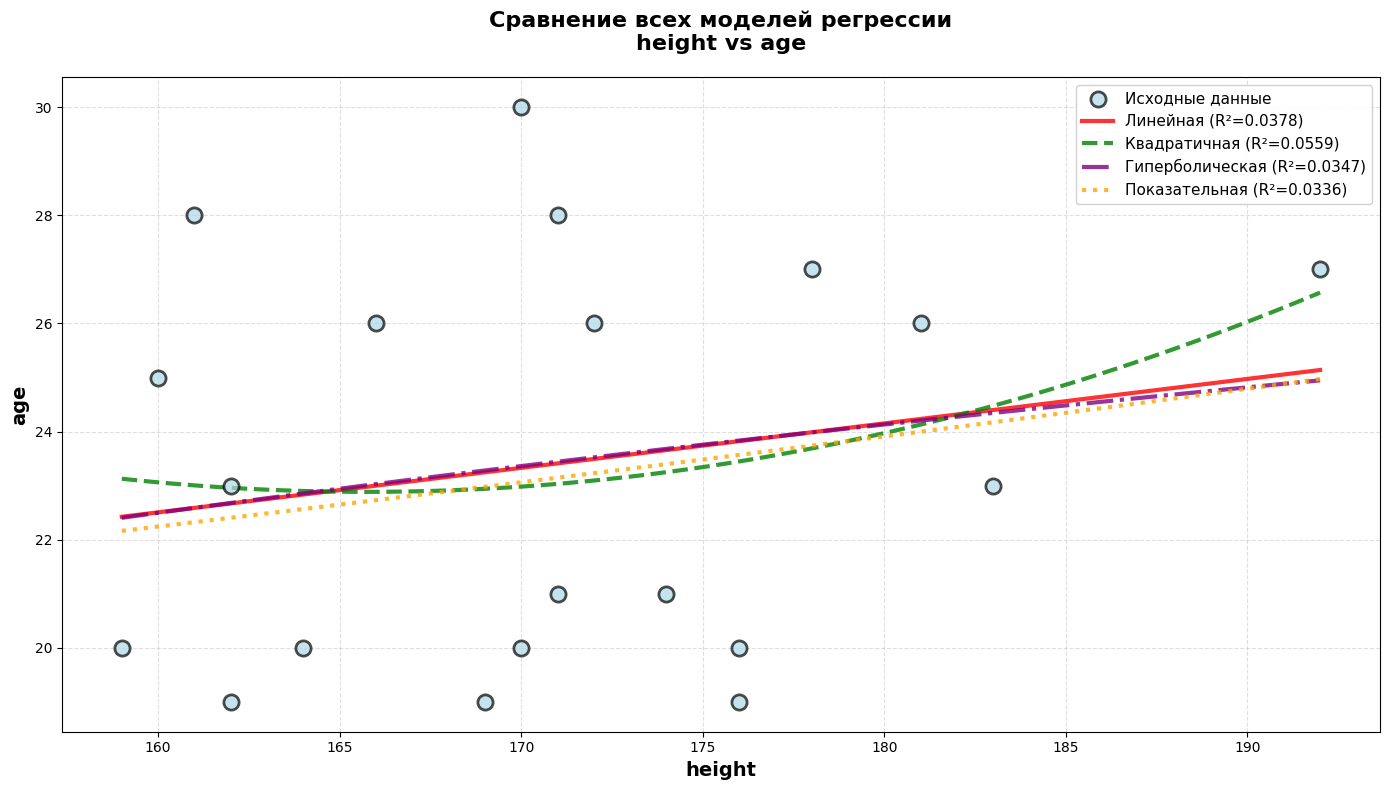

In [140]:
plt.figure(figsize=(14, 8))

plt.scatter(x_data, y_data, alpha=0.7, s=120, edgecolors='black', 
           linewidth=2, label='Исходные данные', color='lightblue', zorder=5)

colors = ['red', 'green', 'purple', 'orange']
linestyles = ['-', '--', '-.', ':']
linewidths = [3, 3, 3, 3]

for (model_name, result), color, linestyle, linewidth in zip(results_manual.items(), colors, linestyles, linewidths):
    if result is not None:
        plt.plot(x_range, result['y_range'], color=color, linewidth=linewidth, 
                linestyle=linestyle, label=f'{model_name} (R²={result["r2"]:.4f})', alpha=0.8)

plt.xlabel(dt1.name, fontsize=14, fontweight='bold')
plt.ylabel(dt2.name, fontsize=14, fontweight='bold')
plt.title(f'Сравнение всех моделей регрессии\n{dt1.name} vs {dt2.name}', 
         fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='best', framealpha=0.9)
plt.grid(True, alpha=0.4, linestyle='--')

plt.tight_layout()
plt.show()

In [141]:
sorted_models = sorted(results_manual.items(), key=lambda x: x[1]['r2'], reverse=True)

print("Рейтинг моделей по R²:")
print("-"*70)

for rank, (model_name, result) in enumerate(sorted_models, 1):
    print(f"{rank}. {model_name:20s}")
    print(f"   R² = {result['r2']:.4f}  |  RMSE = {result['rmse']:.4f}  |  MAE = {result['mae']:.4f}")
    print(f"   {result['equation']}")
    print()

best_model = sorted_models[0]
worst_model = sorted_models[3]

print("-"*70)

print(f"Наилучшая модель: {best_model[0]} регрессия")
print(f"   Коэффициент детерминации R² = {best_model[1]['r2']:.4f}")

if best_model[1]['r2'] > 0.7:
    quality = "высокое"
elif best_model[1]['r2'] > 0.5:
    quality = "среднее"
elif best_model[1]['r2'] > 0.3:
    quality = "низкое"
else:
    quality = "очень низкое"

print(f"   Качество модели: {quality}")
print(f"   Уравнение: {best_model[1]['equation']}")

print(f"   Модель объясняет {best_model[1]['r2']*100:.2f}% вариации зависимой переменной")


Рейтинг моделей по R²:
----------------------------------------------------------------------
1. Квадратичная        
   R² = 0.0559  |  RMSE = 3.4408  |  MAE = 3.0579
   y = 0.0053*x² + -1.7715*x + 169.6891

2. Линейная            
   R² = 0.0378  |  RMSE = 3.4736  |  MAE = 3.1630
   y = 0.0823*x + 9.3470

3. Гиперболическая     
   R² = 0.0347  |  RMSE = 3.4792  |  MAE = 3.1731
   y = -2351.7113/x + 37.1970

4. Показательная       
   R² = 0.0336  |  RMSE = 3.4812  |  MAE = 3.1590
   y = 12.4755 * 1.0036^x

----------------------------------------------------------------------
Наилучшая модель: Квадратичная регрессия
   Коэффициент детерминации R² = 0.0559
   Качество модели: очень низкое
   Уравнение: y = 0.0053*x² + -1.7715*x + 169.6891
   Модель объясняет 5.59% вариации зависимой переменной


## Задание 4

### Критерий Фишера

**Нулевая гипотеза H₀:** уравнение регрессии незначимо 

**Альтернативная гипотеза H₁:** уравнение регрессии значимо

### F-статистика

При справедливости H₀, статистика имеет распределение Фишера:

$$F = \frac{R^2}{1-R^2} \cdot \frac{n-k}{k-1}$$

где:
- $n$ — количество наблюдений
- $k$ — количество параметров модели
- $R^2$ — коэффициент детерминации

### Критическая область

Критическая область критерия — правосторонняя:
- $F_{набл} > F_{крит}$ → отвергаем H₀
- $F_{набл} ≤ F_{крит}$ → не отвергаем H₀
где $F_{крит} = F_{1-α}(k-1, n-k)$ — критическое значение распределения Фишера.

### P-значение

P-значение = $P(F > F_{набл})$ при условии справедливости H₀

**Правило принятия решения:**
- P-значение < α → отвергаем H₀
- P-значение ≥ α → не отвергаем H₀


In [142]:
from scipy.stats import f


alpha = 0.05  
n = len(y_data)  


def fisher_test(model_name, R2, k_params):

    print(f"МОДЕЛЬ: {model_name}")
    print(f"{'='*80}")
    
    df_regression = k_params - 1 
    df_residual = n - k_params 

    F_statistic = (R2 / (1 - R2)) * (df_residual / df_regression)
    F_critical = f.ppf(1 - alpha, df_regression, df_residual)
    p_value = 1 - f.cdf(F_statistic, df_regression, df_residual)

    print(f"\nИСХОДНЫЕ ДАННЫЕ:")
    print(f"   Количество параметров модели (k): {k_params}")
    print(f"   R² = {R2:.6f}")
    
    print(f"\nКРИТЕРИЙ ФИШЕРА:")
    print(f"   F-статистика (наблюдаемое):       {F_statistic:.6f}")
    print(f"   F-критическое (α={alpha}):         {F_critical:.6f}")
    print(f"   P-значение:                        {p_value:.8f}")
    
    print(f"\n{'─'*80}")
    print(f"ПРОВЕРКА ГИПОТЕЗ:")
    print(f"{'─'*80}")
    print(f"H₀: Уравнение регрессии незначимо (w=0)")
    print(f"H₁: Уравнение регрессии значимо (w≠0)")
    print(f"\nУровень значимости: α = {alpha}")

    print(f"\n{'─'*80}")
    print(f"РЕШАЮЩЕЕ ПРАВИЛО:")
    print(f"{'─'*80}")
    print(f"Если F_наблюдаемое > F_критическое → отвергаем H₀")
    print(f"Если P-значение < α → отвергаем H₀")
    
    print(f"\n{'─'*80}")
    print(f"ВЫВОД:")
    print(f"{'─'*80}")
    
    if F_statistic > F_critical or p_value < alpha:
        print(f"F_наблюдаемое ({F_statistic:.6f}) > F_критическое ({F_critical:.6f})")
        print(f"P-значение ({p_value:.8f}) < α ({alpha})")
        print(f"\n Модель ЗНАЧИМА на уровне {alpha*100}%")
        print(f"   Отвергаем нулевую гипотезу H₀")
        print(f"   Регрессионное уравнение статистически значимо")
        print(f"   Модель адекватно описывает данные")
    else:
        print(f"F_наблюдаемое ({F_statistic:.6f}) ≤ F_критическое ({F_critical:.6f})")
        print(f"P-значение ({p_value:.8f}) ≥ α ({alpha})")
        print(f"\n Модель НЕЗНАЧИМА на уровне {alpha*100}%")
        print(f"   Не отвергаем нулевую гипотезу H₀")
        print(f"   Регрессионное уравнение статистически незначимо")
        print(f"   Модель не описывает данные адекватно")
    
    print(f"\n{'='*80}\n")

    return {
        'F_statistic': F_statistic,
        'F_critical': F_critical,
        'p_value': p_value,
        'R2': R2,
        'is_significant': F_statistic > F_critical,
        'df_regression': df_regression,
        'df_residual': df_residual
    }

### Проверка для лучшей модели

In [143]:
if best_model[0] == 'Линейная':
    k_params = 2  # w0, w1
elif best_model[0] == 'Квадратичная':
    k_params = 3   # w0, w1, w2
elif best_model[0] == 'Гиперболическая':
    k_params = 2   # w0, w1
elif best_model[0] == 'Показательная':
    k_params = 2   # w0, w1 

best_result = fisher_test(
    model_name=f"{best_model[0]} регрессия",
    R2=best_model[1]['r2'],
    k_params=k_params
)

МОДЕЛЬ: Квадратичная регрессия

ИСХОДНЫЕ ДАННЫЕ:
   Количество параметров модели (k): 3
   R² = 0.055898

КРИТЕРИЙ ФИШЕРА:
   F-статистика (наблюдаемое):       0.503264
   F-критическое (α=0.05):         3.591531
   P-значение:                        0.61328334

────────────────────────────────────────────────────────────────────────────────
ПРОВЕРКА ГИПОТЕЗ:
────────────────────────────────────────────────────────────────────────────────
H₀: Уравнение регрессии незначимо (w=0)
H₁: Уравнение регрессии значимо (w≠0)

Уровень значимости: α = 0.05

────────────────────────────────────────────────────────────────────────────────
РЕШАЮЩЕЕ ПРАВИЛО:
────────────────────────────────────────────────────────────────────────────────
Если F_наблюдаемое > F_критическое → отвергаем H₀
Если P-значение < α → отвергаем H₀

────────────────────────────────────────────────────────────────────────────────
ВЫВОД:
────────────────────────────────────────────────────────────────────────────────
F_наблюдаемое

### Проверка для худшей модели

In [144]:
if worst_model[0] == 'Линейная':
    k_params = 2  # w0, w1
elif worst_model[0] == 'Квадратичная':
    k_params = 3   # w0, w1, w2
elif worst_model[0] == 'Гиперболическая':
    k_params = 2   # w0, w1
elif worst_model[0] == 'Показательная':
    k_params = 2   # w0, w1 

best_result = fisher_test(
    model_name=f"{worst_model[0]} регрессия",
    R2=worst_model[1]['r2'],
    k_params=k_params
)

МОДЕЛЬ: Показательная регрессия

ИСХОДНЫЕ ДАННЫЕ:
   Количество параметров модели (k): 2
   R² = 0.033619

КРИТЕРИЙ ФИШЕРА:
   F-статистика (наблюдаемое):       0.626186
   F-критическое (α=0.05):         4.413873
   P-значение:                        0.43906140

────────────────────────────────────────────────────────────────────────────────
ПРОВЕРКА ГИПОТЕЗ:
────────────────────────────────────────────────────────────────────────────────
H₀: Уравнение регрессии незначимо (w=0)
H₁: Уравнение регрессии значимо (w≠0)

Уровень значимости: α = 0.05

────────────────────────────────────────────────────────────────────────────────
РЕШАЮЩЕЕ ПРАВИЛО:
────────────────────────────────────────────────────────────────────────────────
Если F_наблюдаемое > F_критическое → отвергаем H₀
Если P-значение < α → отвергаем H₀

────────────────────────────────────────────────────────────────────────────────
ВЫВОД:
────────────────────────────────────────────────────────────────────────────────
F_наблюдаемо